In [217]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [218]:
X = np.array([
    [0.5],
    [1.0],
    [1.5],
    [2.0],
    [2.5],
    [3.0],
    [3.5],
    [4.0],
])
Y = np.array([0, 0, 1, 0, 0, 1, 1, 1])

In [219]:
N = X.shape[0]
y_hot = np.zeros((N,2))
y_hot[range(N),Y] = 1
y_hot

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [220]:
X = np.hstack([np.ones((X.shape[0],1)), X])
X

array([[1. , 0.5],
       [1. , 1. ],
       [1. , 1.5],
       [1. , 2. ],
       [1. , 2.5],
       [1. , 3. ],
       [1. , 3.5],
       [1. , 4. ]])

In [221]:
X[0]

array([1. , 0.5])

In [222]:
theta = np.array([[0.1, 0.2], [0.3, 0.4]])
theta

array([[0.1, 0.2],
       [0.3, 0.4]])

In [223]:
print(y_hot)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [224]:
learning_rate = 0.1
n_epochs = 20
n_samples = X.shape[0]
losses = []

x = X[0].reshape((2,1))
y = y_hot[0].reshape((2,1))

for i in range(20):
    for j in range(n_samples):
        xi = X[j]
        yi = y_hot[j]
        
        xi = xi.reshape((2,1))
        yi = yi.reshape((2,1))
        
        z = theta.T.dot(x)
        y_hat = np.exp(z) / np.sum(np.exp(z))
        
        loss = -np.log(y.T.dot(y_hat))
        losses.append(loss[0])
        
        gradient = xi.dot((y_hat - y).T)
        theta = theta - learning_rate*gradient

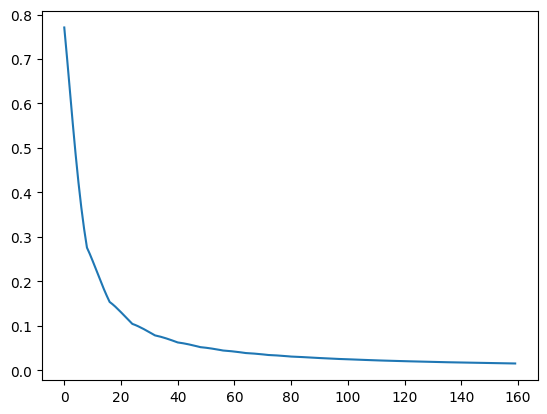

In [225]:
plt.plot(losses)
plt.show()

In [226]:
x_test = np.array([1 , 0.25]).reshape((2,1))
z = theta.T.dot(x_test)
y_hat = np.exp(z)/np.sum(np.exp(z))
pred = np.argmax(y_hat)
print(f'class predict: {pred}')

class predict: 0


In [227]:
X , y_hot

(array([[1. , 0.5],
        [1. , 1. ],
        [1. , 1.5],
        [1. , 2. ],
        [1. , 2.5],
        [1. , 3. ],
        [1. , 3.5],
        [1. , 4. ]]),
 array([[1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.]]))

In [228]:
theta = np.array([[0.1, 0.2], [0.3, 0.4]])
theta

array([[0.1, 0.2],
       [0.3, 0.4]])

In [229]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z),axis = 1,keepdims= True)

def predict(x,theta):
    z = x.dot(theta)
    y_hat = softmax(z)
    
    return z , y_hat

z, y_hat = predict(X, theta)
z, y_hat

(array([[0.25, 0.4 ],
        [0.4 , 0.6 ],
        [0.55, 0.8 ],
        [0.7 , 1.  ],
        [0.85, 1.2 ],
        [1.  , 1.4 ],
        [1.15, 1.6 ],
        [1.3 , 1.8 ]]),
 array([[0.46257015, 0.53742985],
        [0.450166  , 0.549834  ],
        [0.4378235 , 0.5621765 ],
        [0.42555748, 0.57444252],
        [0.41338242, 0.58661758],
        [0.40131234, 0.59868766],
        [0.38936077, 0.61063923],
        [0.37754067, 0.62245933]]))

In [230]:
def compute_loss(y_hat,y):
    loss = -np.log(np.sum(y_hat*y , axis= 1))
    return loss

loss = compute_loss(y_hat,y_hot)
loss

array([0.77095705, 0.79813887, 0.57593942, 0.85435524, 0.88338216,
       0.51301525, 0.49324895, 0.47407698])

In [231]:
def compute_gradient(y_hat,y,x):
    gradient = x.T.dot(y_hat-y)
    return gradient


gradient = compute_gradient(y_hat,y_hot,X)
gradient

array([[-0.64228666,  0.64228666],
       [ 1.29961972, -1.29961972]])

In [232]:
lr = 0.01

def update_weight(theta,gradient,lr):
    theta = theta - lr*gradient
    return theta

theta = update_weight(theta, gradient, lr)
theta

array([[0.10642287, 0.19357713],
       [0.2870038 , 0.4129962 ]])

In [233]:
theta = np.random.rand(2,2)
learning_rate = 0.01
n_epochs = 500
n_samples = X.shape[0]

losses = []
for i in range(n_epochs):
    z,y_hat = predict(X,theta)
    
    loss = compute_loss(y_hat,y_hot)
    losses.append(np.sum(loss))
    
    gradient = compute_gradient(y_hat,y_hot,X)
    
    theta = update_weight(theta,gradient,learning_rate)

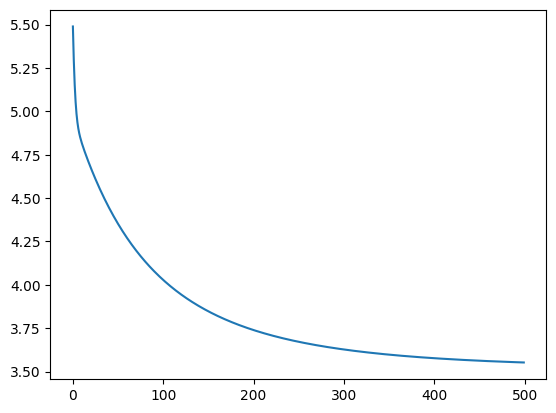

In [234]:
plt.plot(losses)
plt.show()

### Thu 4

In [235]:
iris = np.genfromtxt('iris_1D_2c.csv',dtype=None,delimiter=',',skip_header=1)
iris

array([[1.4, 0. ],
       [1.3, 0. ],
       [1.5, 0. ],
       [4.5, 1. ],
       [4.1, 1. ],
       [4.6, 1. ]])

In [236]:
X = iris[:,0:1]
y = iris[:,1]

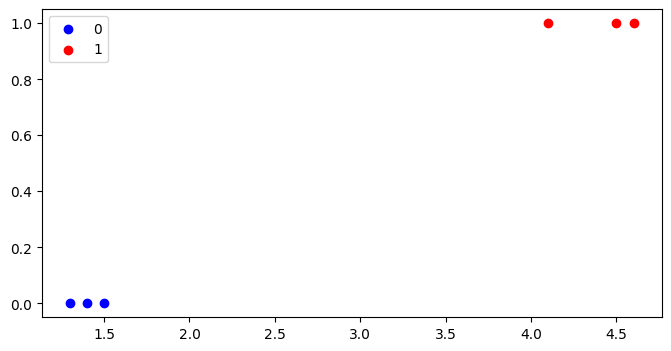

In [237]:
y = y.astype('uint8')
plt.figure(figsize=(8, 4))
plt.scatter(X[y == 0][:, 0], y[y == 0], color='b', label='0')
plt.scatter(X[y == 1][:, 0], y[y == 1], color='r', label='1')
plt.legend()
plt.show()

In [238]:
N = y.shape[0]
one_hot = np.zeros((N,2))
one_hot[range(N),y] = 1
one_hot

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [239]:
w = np.array([[0.2], [-0.1]])
b = np.array([[0.1], [ 0.05]])

print('w:\n', w)
print('b:\n', b)

w:
 [[ 0.2]
 [-0.1]]
b:
 [[0.1 ]
 [0.05]]


In [240]:
learning_rate = 0.1
losses = []
max_epoch = 100

for i in range(max_epoch):
    for j in range(N):
        xi = X[j]
        yi = one_hot[j]
        yi = yi.reshape((2,1))
        
        z = xi*w + b
        
        exp_z = np.exp(z)
        y_hat = exp_z/np.sum(exp_z,axis=0)
        
        loss = -np.log(yi.T.dot(y_hat))
        losses.append(np.sum(loss))
        
        dz = y_hat - yi
        dw = dz*xi
        db = dz
        
        w = w - learning_rate*dw
        b = b - learning_rate*db

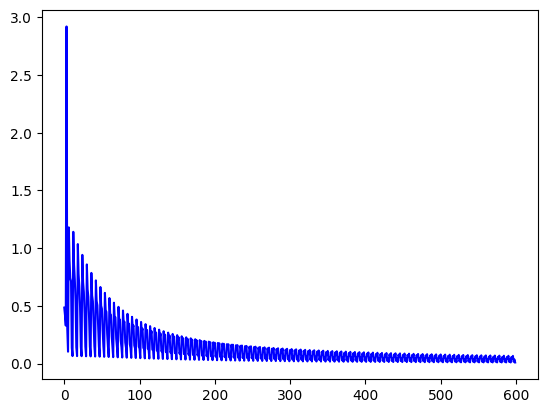

In [241]:
x_axis = range(len(losses))
plt.plot(x_axis,losses, color="blue")
plt.show()

In [242]:
score = []

for i in range(N):
    xi = X[i]
    yi = one_hot[i]
    yi = yi.reshape((2,1))
    
    z = xi*w + b
    score.append(z)
score

[array([[ 1.56757503],
        [-1.27757503]]),
 array([[ 1.67923788],
        [-1.39923788]]),
 array([[ 1.45591218],
        [-1.15591218]]),
 array([[-1.89397321],
        [ 2.49397321]]),
 array([[-1.44732183],
        [ 2.00732183]]),
 array([[-2.00563606],
        [ 2.61563606]])]

In [243]:
predicted_class = np.argmax(score, axis=1)
predicted_class

array([[0],
       [0],
       [0],
       [1],
       [1],
       [1]], dtype=int64)

X:
 [[1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [4.7 1.6]
 [3.3 1.1]
 [4.6 1.3]
 [5.6 2.2]
 [5.1 1.5]
 [5.6 1.4]]
y:
 [0 0 0 1 1 1 2 2 2]


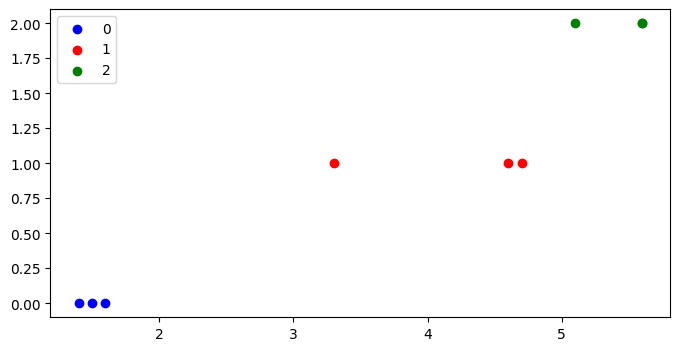

In [244]:
from sklearn import preprocessing

iris = np.genfromtxt('iris_2D_3c.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, 0:2]
y = iris[:, 2]
y = y.astype('uint8')

print('X:\n', X)
print('y:\n', y)

plt.figure(figsize=(8, 4))
plt.scatter(X[y == 0][:, 0], y[y == 0], color='b', label='0')
plt.scatter(X[y == 1][:, 0], y[y == 1], color='r', label='1')
plt.scatter(X[y == 2][:, 0], y[y == 2], color='g', label='2')
plt.legend()
plt.show()

In [245]:
N = y.shape[0]
def one_hot_endcoding(y,k):
    one_hot = np.zeros((N,k))
    one_hot[range(N),y] = 1
    return one_hot
y_one_hot = one_hot_endcoding(y, 3)
print(y_one_hot)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [246]:
X = np.hstack([np.ones((X.shape[0],1)),X])
X

array([[1. , 1.5, 0.2],
       [1. , 1.4, 0.2],
       [1. , 1.6, 0.2],
       [1. , 4.7, 1.6],
       [1. , 3.3, 1.1],
       [1. , 4.6, 1.3],
       [1. , 5.6, 2.2],
       [1. , 5.1, 1.5],
       [1. , 5.6, 1.4]])

In [247]:
d = 3 # dimensionality
k = 3 # number of classes
theta = 0.01 * np.random.randn(d, k)
print('theta:\n', theta)

theta:
 [[-0.02038146 -0.00987295  0.01280124]
 [-0.00326524  0.00224643 -0.00569621]
 [-0.00597027 -0.00344767 -0.0151469 ]]


In [248]:
lr = 0.01
losses = []
epoch = 3000

for i in range(epoch):
    z = X.dot(theta)
    
    y_hat = np.exp(z)/np.sum(np.exp(z),axis=1,keepdims=True)
    
    loss = -np.log(np.sum(y_hat*y_one_hot ,axis= 1))
    losses.append(np.sum(loss))
    
    gradient = X.T.dot(y_hat-y_one_hot)
    
    theta = theta - lr*gradient

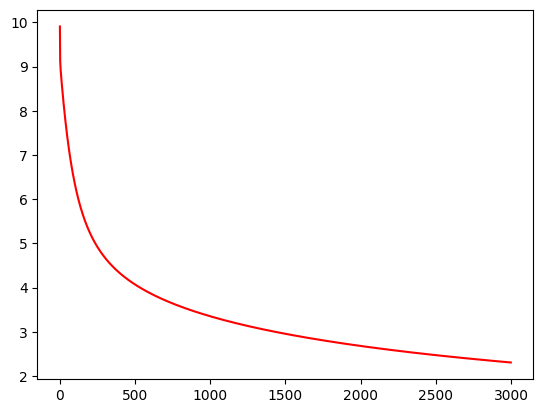

In [249]:
x_axis = range(len(losses))
plt.plot(x_axis, losses, color="r")
plt.show()

In [250]:
z = X.dot(theta)
y_hat = np.exp(z) / np.sum(np.exp(z),axis=1,keepdims=True)
print(y_hat)

[[9.52535755e-01 4.73128506e-02 1.51393952e-04]
 [9.55253648e-01 4.46289396e-02 1.17411964e-04]
 [9.49655632e-01 5.01491920e-02 1.95176255e-04]
 [1.12579502e-03 5.69594225e-01 4.29279980e-01]
 [5.54251377e-02 8.87118313e-01 5.74565498e-02]
 [5.71335368e-03 5.72714536e-01 4.21572111e-01]
 [1.22921541e-05 2.43249700e-01 7.56738007e-01]
 [9.45679937e-04 3.63717241e-01 6.35337079e-01]
 [5.42748277e-04 1.68706413e-01 8.30750839e-01]]


In [251]:
predicted_class = np.argmax(y_hat,axis=1)
predicted_class

array([0, 0, 0, 1, 1, 1, 2, 2, 2], dtype=int64)

#### Using pytorch

In [252]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

In [253]:
iris = np.genfromtxt('iris_1D_2c.csv', dtype=None, delimiter=',', skip_header=1)
X = torch.tensor(iris[:, 0:1], dtype=torch.float32)
y = torch.tensor(iris[:, 1], dtype=torch.int64)
X,Y

(tensor([[1.4000],
         [1.3000],
         [1.5000],
         [4.5000],
         [4.1000],
         [4.6000]]),
 array([0, 0, 1, 0, 0, 1, 1, 1]))

In [254]:
y = torch.tensor([0,0,0,1,1,2,2,2,8], dtype=torch.int64)
len(torch.unique(y))

4

In [255]:
class SoftmaxRegression(nn.Module):
    def __init__(self, input_dim,output_dim):
        super(SoftmaxRegression ,self).__init__()
        self.linear = nn.Linear(input_dim,output_dim)
        
        self.linear.weight.data = torch.Tensor([[0.2],[-0.1]])
        self.linear.bias.data = torch.Tensor([0.1 , 0.05])
    
    def forward(self,x):
        return self.linear(x)

In [256]:
input_dim = X.shape[1]
output_dim = len(torch.unique(y))
print(input_dim,output_dim)
model = SoftmaxRegression(input_dim, output_dim)

1 4


In [257]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [258]:
epoch = 1

for i in range(epoch):
    for j in range(X.shape[0]):
        xi = X[j].unsqueeze(0)
        yi = y[j].unsqueeze(0)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(xi)
        print(f'outputs: {outputs.data}')
        
        loss = criterion(outputs, yi)
        print(f'loss: {loss}')
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        break

print(model.linear.weight)
print(model.linear.bias)

outputs: tensor([[ 0.3800, -0.0900]])
loss: 0.4855092167854309
Parameter containing:
tensor([[ 0.2538],
        [-0.1538]], requires_grad=True)
Parameter containing:
tensor([0.1385, 0.0115], requires_grad=True)


In [259]:
# Load data
iris = np.genfromtxt('iris_1D_2c.csv', dtype=None, delimiter=',', skip_header=1)
X = torch.tensor(iris[:, 0:1], dtype=torch.float32)
y = torch.tensor(iris[:, 1], dtype=torch.int64)

# Define the model
class SoftmaxRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SoftmaxRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
        # set value (for illustration)
        self.linear.weight.data = torch.Tensor([[0.2], [-0.1]])
        self.linear.bias.data = torch.Tensor([0.1, 0.05])
        
    def forward(self, x):
        return self.linear(x)

input_dim = X.shape[1]
output_dim = len(torch.unique(y))
model = SoftmaxRegression(input_dim, output_dim)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
max_epoch = 1
for epoch in range(max_epoch):    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(X)
    print(f'outputs: {outputs.data}')
    
    loss = criterion(outputs, y)
    print(f'loss: {loss}')
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()

print(model.linear.weight)
print(model.linear.bias)

outputs: tensor([[ 0.3800, -0.0900],
        [ 0.3600, -0.0800],
        [ 0.4000, -0.1000],
        [ 1.0000, -0.4000],
        [ 0.9200, -0.3600],
        [ 1.0200, -0.4100]])
loss: 1.0411728620529175
Parameter containing:
tensor([[0.0514],
        [0.0486]], requires_grad=True)
Parameter containing:
tensor([0.0794, 0.0706], requires_grad=True)
